<a href="https://colab.research.google.com/github/suddhasourav/learning_nldynamics_chaos_strogatz/blob/main/Chap_5_Linear_2D_Vector_Fields_Strogatz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basics**

In this exercise, we are going to learn how to quickly visualize *all* linear, two-dimensional vector fields. Take, for example, the simple harmonic oscillator, whose linearized governing equation is

> $m \ddot{x} = -k \dot{x}$,
>
> $\Rightarrow \ddot{x} = -\frac{k}{m} \dot{x}$

This equation can be represented with two variables, and with only one differentiation operator (see Chapter 1), as
> $ \dot{x} = y$
> 
> $ \dot{y} = -\frac{k}{m} x$

The main idea of this chapter is a quick recap of linear vector fields in 2D. Compared to nonlinear systems these are "easy", and there are some patterns to remember that are entirely governed by two variables: the *trace*, and the *determinant* of the matrix that represents 2D linear system.

Consider the following system:

> $\dot{x} = ax + by$
>
> $\dot{y} = cx + dy$

We can write this system as

> $\dot{\mathbf{x}} = \mathit{A}\mathbf{x}$, where
>
> $\mathbf{x} = \begin{pmatrix} x \\ y\end{pmatrix}$ and 
> $\mathit{A} = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$

The trace $(\tau)$ and the determinant $(\Delta)$ of $\mathit{A}$ are defined as

> $\tau = a + d$
>
> $\Delta = ad - bc$ 

Below, we play with the variables a, b, c, d, and see what happens to the vector fields. On the right side is Fig. 5.2.8 - it shows how the trace and determinant define the type of vector field.

In [ ]:
# Import sundry libraries
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt

τ = 0, Δ = 1.0, τ² - 4Δ = -4.0
-1.0, 0.9900000000000018
-1.0, 0.9900000000000018


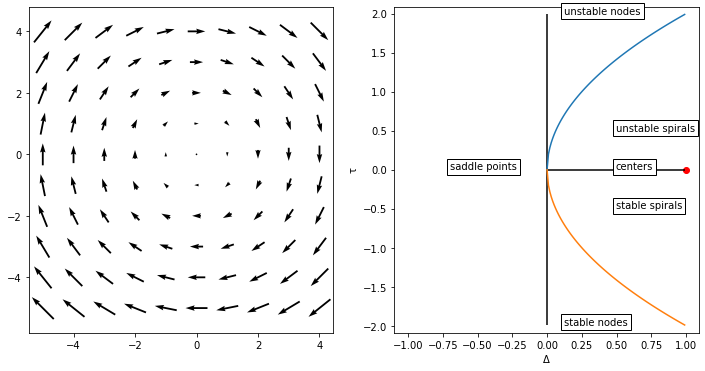

In [ ]:
x = np.arange(-5,5,1)
y = np.arange(-5,5,1)

a = 0
b = 1.0
c = -1.0
d = 0

# Categorizing the type of linear system. First, we calculate the trace and
# determinant
τ = a + d
Δ = a*d - b*c
# Then calculate (τ² - 4Δ) and output the values
print(f"τ = {τ}, Δ = {Δ}, τ² - 4Δ = {τ**2 - 4*Δ}")

X, Y = np.meshgrid(x,y)
Ẋ = a*X + b*Y
Ẏ = c*X + d*Y

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

ax0.quiver(X, Y, Ẋ, Ẏ, pivot='mid')
ax0.axis('equal')

τ_vector = np.arange(-max([1., abs(τ)]), max([1., abs(τ)]), 1./100 if (abs(τ) < 0.01) else τ/100)
Δ_vector = np.arange(-max([1., abs(Δ)]), max([1., abs(Δ)]), 1./100 if (abs(Δ) < 0.01) else Δ/100)
print(f"{np.min(τ_vector)}, {np.max(τ_vector)}")
print(f"{np.min(Δ_vector)}, {np.max(Δ_vector)}")

f_boundary_pos = 2*np.sqrt(Δ_vector[Δ_vector >= 0])
f_boundary_neg = -2*np.sqrt(np.abs(Δ_vector[Δ_vector >= 0]))
ax1.plot(Δ_vector[Δ_vector >= 0], f_boundary_pos)
ax1.plot(Δ_vector[Δ_vector >= 0], f_boundary_neg)
ax1.hlines(0, 0, np.max(Δ_vector), colors='k')
ax1.vlines(0, np.min(f_boundary_neg), np.max(f_boundary_pos), colors='k')
ax1.set_xlabel("Δ")
ax1.set_ylabel("τ")
ax1.set_xlim(np.min(Δ_vector) - 0.1, np.max(Δ_vector) + 0.1)
ax1.set_ylim(np.min(f_boundary_neg) - 0.1, np.max(f_boundary_pos) + 0.1)

ax1.text(np.min(Δ_vector + 0.3), 0, 'saddle points', bbox={'facecolor': 'white', 'pad': 3})
ax1.text(np.max(Δ_vector)/2, 0, 'centers', bbox={'facecolor': 'white', 'pad': 3})
ax1.text(np.max(Δ_vector)/2, np.min(τ_vector)/2, 'stable spirals', bbox={'facecolor': 'white', 'pad': 3})
ax1.text(np.max(Δ_vector)/8, np.min(f_boundary_neg), 'stable nodes', bbox={'facecolor': 'white', 'pad': 3})
ax1.text(np.max(Δ_vector)/2, np.max(τ_vector)/2, 'unstable spirals', bbox={'facecolor': 'white', 'pad': 3})
ax1.text(np.max(Δ_vector)/8, np.max(f_boundary_pos), 'unstable nodes', bbox={'facecolor': 'white', 'pad': 3})
ax1.scatter(Δ, τ, c= "red")